In [1]:
import zeep
from datetime import datetime
import json
import pandas as pd

wsdl = './FachadaWSSGS (3).wsdl'
client = zeep.Client(wsdl=wsdl)


ModuleNotFoundError: No module named 'zeep'

In [57]:
long_array_type = client.get_type('ns0:ArrayOfflong')
r = client.service.getValoresSeriesVO(long_array_type([7384]), '01/01/2000', '05/04/2021')

# s = str(r).replace("'", '"')\
#     .replace("None", '"None"')\
#         .replace("False", '"False"')\
#             .replace("True", '"True"')
# s = re.sub(r""""_value_1": Decimal\(\"(\d+)\"\)""", r""""_value_1": \1""", s)

In [58]:
a = zeep.helpers.serialize_object(r[0]['valores'])

In [59]:
a = pd.DataFrame(a)
a['valor'] = a['valor'].apply(lambda x: int(x['_value_1']))

In [60]:
a['date'] = a.apply(lambda x: datetime(x['ano'], x['mes'], x['dia']), axis = 1)
a = a.set_index('date')

<AxesSubplot:xlabel='date'>

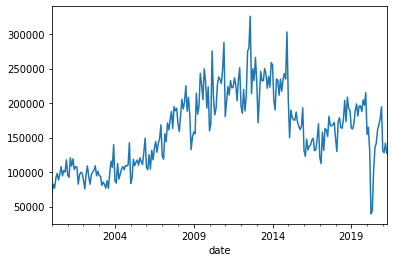

In [61]:
a['valor'].plot(kind='line')

0       69984
1       82262
2       76748
3       91613
4       98154
        ...  
239    215154
240    154556
241    165109
242    131230
243     39487
Name: valor, Length: 244, dtype: int64

In [11]:
for v in r[0].valores:
    print(v.ano)

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2016
2016
2016
2016
2016
2016
2016
2016


In [82]:
data = json.loads(s)

In [93]:
data[0]['valores'][1]['valor']['_value_1']

82262

In [19]:
type(r)

zeep.objects.ArrayOffWSSerieVO

In [20]:
r.sort()
r

[{
     'anoFim': 0,
     'anoInicio': 1990,
     'aviso': {
         '_value_1': None,
         'id': None,
         'href': None,
         '_attr_1': {
             '{http://www.w3.org/2001/XMLSchema-instance}nil': 'true'
         }
     },
     'diaFim': 0,
     'diaInicio': 31,
     'especial': False,
     'fonte': {
         '_value_1': 'Fenabrave',
         'id': None,
         'href': None,
         '_attr_1': {
     }
     },
     'fullName': {
         '_value_1': 'Sales of factory authorized vehicle outlets - Passenger cars sales',
         'id': None,
         'href': None,
         '_attr_1': {
     }
     },
     'gestorProprietario': {
         '_value_1': 'DEPEC/COACE',
         'id': None,
         'href': None,
         '_attr_1': {
     }
     },
     'mesFim': 0,
     'mesInicio': 1,
     'nomeAbreviado': {
         '_value_1': 'Vendas de veículos pelas concessionárias - Automóveis',
         'id': None,
         'href': None,
         '_attr_1': {
     }
     },
   

In [21]:
json.loads(str(r).replace("'", '"').replace("None", '"None"'))

JSONDecodeError: Expecting value: line 14 column 17 (char 293)

In [79]:
with open('nf.json', 'w+') as f:
    s = str(r).replace("'", '"')\
        .replace("None", '"None"')\
            .replace("False", '"False"')\
                .replace("True", '"True"')
    s = re.sub(r""""_value_1": Decimal\(\"(\d+)\"\)""", r""""_value_1": \1""", s)
    f.write(s)

In [176]:
a = r.pop()
a

IndexError: pop from empty list

In [26]:
s = """"_value_1": Decimal("69984"),"""

In [65]:
re.findall(r""""_value_1": Decimal\(\"(\d+)\"\)""", s)

['69984']

In [27]:
import re

In [72]:
resp = re.sub(r""""_value_1": Decimal\(\"(\d+)\"\)""", r""""_value_1": Decimal(\1)""", s)
print(resp)

"_value_1": Decimal(69984),
